## Importing Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.2f}'.format

## Loading the Dataset

In [107]:
df=pd.read_csv('zomato.csv')

## Removing column 1 and column 2 from DataFrame

In [108]:
cols=list(df.columns)
cols=cols[2:]
df=df[cols]
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.40,7,200.00,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.90,48,400.00,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.70,37,400.00,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.70,135,550.00,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.80,40,700.00,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [109]:
df.shape

(7105, 10)

There are 7105 restaurants listed in the dataset and 10 rows of data.

## Dataframe Info

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


## Check For Duplicates Data

In [111]:
df.duplicated().any()

False

so, There are none duplicate data in the dataset.

## Checking for null values

In [112]:
df.isnull().sum()

restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

So, we have null values in avg cost column and rate column, so let's deal with these null values.

## Dealing with the Null Values

In [113]:
avg_rating=df['rate (out of 5)'].median()
df['rate (out of 5)']=df['rate (out of 5)'].fillna(avg_rating)

So, here we have filled the null values in rate column with the median of all ratings.

In [114]:
mid_cost=df['avg cost (two people)'].median()
df['avg cost (two people)']=df['avg cost (two people)'].fillna(mid_cost)

And, we have filled the null values in avg cost column with the median of avg cost of remaining restaurants.

In [115]:
df.describe(include=np.number)

,rate (out of 5),num of ratings,avg cost (two people)
count,7105.00,7105.00,7105.00
mean,3.51,188.92,539.16
std,0.46,592.17,461.21
min,1.80,1.00,40.00
25%,3.20,16.00,300.00
50%,3.50,40.00,400.00
75%,3.80,128.00,600.00
max,4.90,16345.00,6000.00


## Cleaning Restaurant Name column in Dataset

In [116]:
df['restaurant name']=df['restaurant name'].str.replace('[^a-zA-Z 0-9]','',regex=True)

so, here we are replacing all the other characters except alphabets, numeric and whitespace from our restaurant column using a regex expression.

In [117]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,FeelTheROLL,Quick Bites,3.40,7,200.00,No,No,Fast Food,Bellandur,Bellandur
1,L81 Cafe,Quick Bites,3.90,48,400.00,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,refuel,Cafe,3.70,37,400.00,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,Biryani Central,Casual Dining,2.70,135,550.00,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,The Bbq,Casual Dining,2.80,40,700.00,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


## Finding Outliers on the basis of Average Cost(two people)

In [118]:
q1=df['avg cost (two people)'].quantile(0.25)
q3=df['avg cost (two people)'].quantile(0.75)
iqr=q3-q1
lx=q1-1.5*iqr
ux=q3+1.5*iqr
print(f'upper extreme cost:{ux}')
df.loc[df['avg cost (two people)']>ux]

upper extreme cost:1050.0


,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
11,1131 Bar Kitchen,"Bar, Casual Dining",4.40,2861,1500.00,No,Yes,"Continental, Asian, Italian, North Indian",Old Airport Road,Indiranagar
12,12th Main Grand Mercure,Fine Dining,4.10,353,2000.00,No,Yes,"European, Asian","Byresandra,Tavarekere,Madiwala",Koramangala 3rd Block
14,1522 The Pub,Pub,4.20,1731,1400.00,Yes,No,"Chinese, Continental, North Indian",Malleshwaram,Malleshwaram
21,1Q1,"Casual Dining, Bar",4.30,595,2500.00,No,Yes,"Asian, Japanese, Thai, Malaysian, Vietnamese, ...",Brigade Road,Infantry Road
24,20 Char Sterlings MAC Hotel,"Casual Dining, Bar",4.00,419,1400.00,Yes,Yes,"Chinese, Continental, North Indian, South Indi...",Indiranagar,Old Airport Road
...,...,...,...,...,...,...,...,...,...,...
7078,Zanzibar Davanam Sarovar Portico Suites,Bar,3.50,39,1200.00,No,No,Finger Food,"Byresandra,Tavarekere,Madiwala",BTM
7083,ZBar,Bar,4.10,410,1500.00,No,Yes,"Finger Food, North Indian",Electronic City,Electronic City
7088,Zen The Leela Palace,Fine Dining,4.10,245,3500.00,No,Yes,"Thai, Japanese, Chinese",Indiranagar,Old Airport Road
7097,Zodiac,Casual Dining,3.60,62,1500.00,No,No,"Italian, Mexican, Mediterranean, North Indian,...",Brookefield,Whitefield


So, by this we get to know that there are 661 restaurants that are having avg cost(two people) more than the upper extreme value of avg cost.

## Outliers as per avg cost Visualization

<Axes: ylabel='avg cost (two people)'>

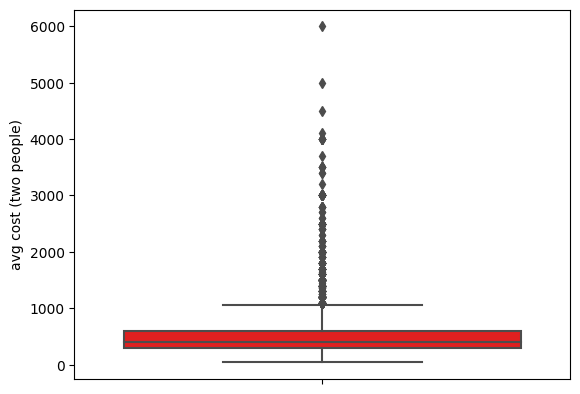

In [119]:
sns.boxplot(data=df,y='avg cost (two people)',color='red')

## Online order preferences

In [120]:
df['online_order'].value_counts()

online_order
Yes    3727
No     3378
Name: count, dtype: int64

Text(0, 0.5, 'Count of online orders option')

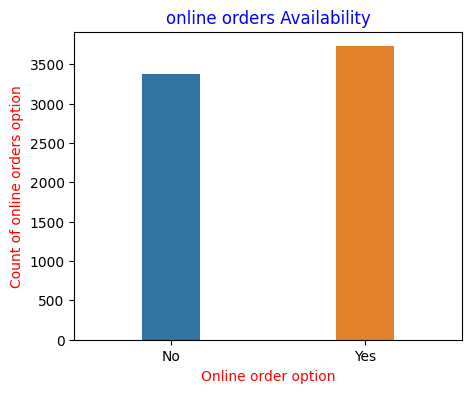

In [121]:
plt.figure(figsize=(5,4))
plt.title('online orders Availability',color='blue')
sns.countplot(data=df,x='online_order',width=0.3)
plt.xlabel('Online order option',color='red')
plt.ylabel('Count of online orders option',color='red')


## Restaurants with Table Booking option

In [122]:
df['table booking'].value_counts()

table booking
No     6361
Yes     744
Name: count, dtype: int64

Text(0, 0.5, 'Count of Table Booking option')

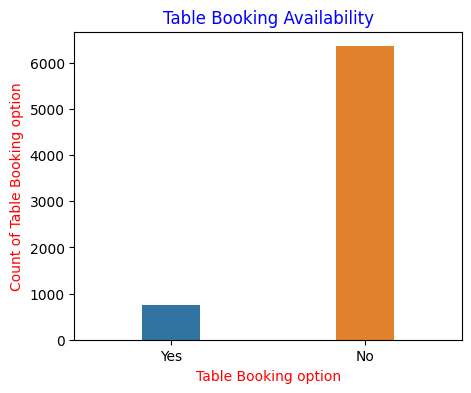

In [123]:
plt.figure(figsize=(5,4))
plt.title('Table Booking Availability',color='blue')
sns.countplot(data=df,x='table booking',width=0.3,order=['Yes','No'])
plt.xlabel('Table Booking option',color='red')
plt.ylabel('Count of Table Booking option',color='red')


So, There are just 744 restaurants with prior Table Booking option Available.

## Number of Restaurants in particular Area

In [124]:
df['area'].value_counts()

area
Byresandra,Tavarekere,Madiwala    798
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      464
Indiranagar                       455
Electronic City                   403
Malleshwaram                      402
Kalyan Nagar                      384
Bellandur                         361
Banashankari                      359
Whitefield                        261
Marathahalli                      260
HSR                               241
Basavanagudi                      214
New BEL Road                      168
Koramangala 4th Block             162
Rajajinagar                       148
Lavelle Road                      141
Jayanagar                         127
Frazer Town                       126
Sarjapur Road                     108
Old Airport Road                   91
Church Street                      77
Koramangala 6th Block              71
JP Nagar                           69
Kammanahalli                       65
Koraman

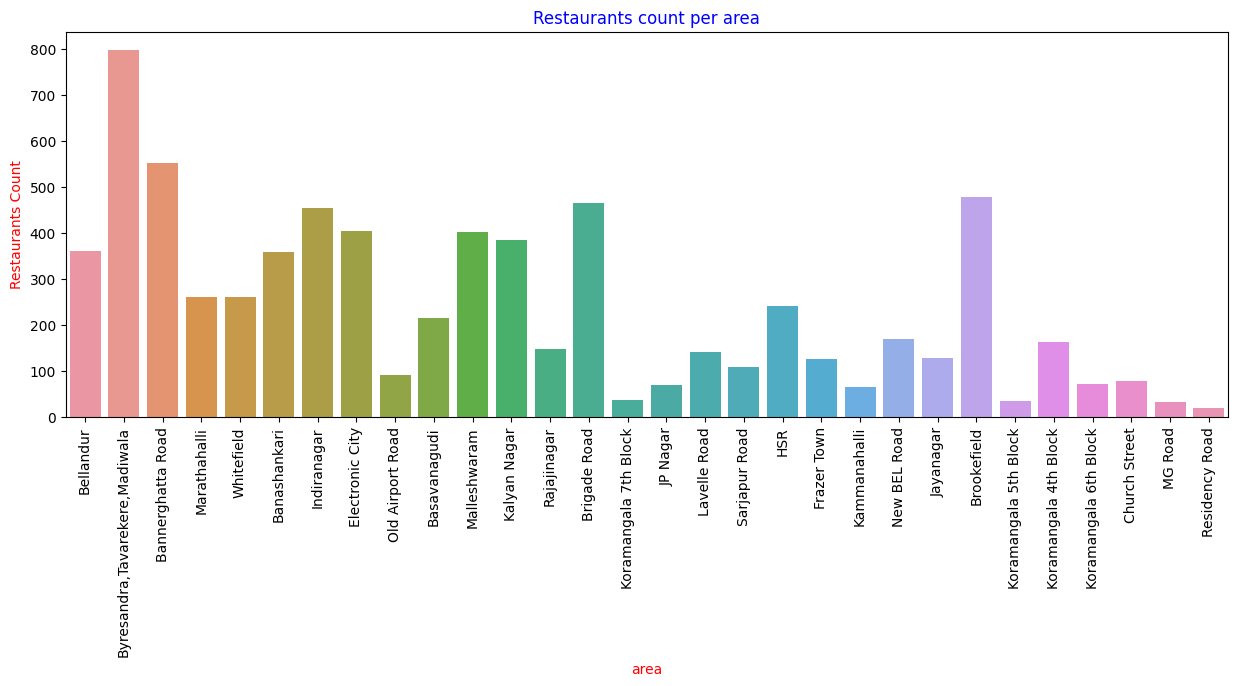

In [125]:
plt.figure(figsize=(15,5))
plt.title('Restaurants count per area',color='blue')
sns.countplot(data=df,x='area')
plt.xlabel('area',color='red')
plt.ylabel('Restaurants Count',color='red')
plt.xticks(rotation='vertical')
plt.show()


So, we get to know that 'Byresandra,Tavarekere,Madiwala' has the maximum number of restaurants and 'Residency Road' has the least number of restaurants.

## Categorize restaurants on the basis of Average cost for two people

In [126]:
def rest_category(cost):
    if(cost)<=200:
        return 'very cheap'
    elif(cost)<=400:
        return 'cheap'
    elif(cost)<=600:
        return 'moderate'
    elif(cost)<=1000:
        return 'moderately expensive'
    else:
        return 'Expensive'
df['Category']=df['avg cost (two people)'].apply(rest_category)
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,Category
0,FeelTheROLL,Quick Bites,3.40,7,200.00,No,No,Fast Food,Bellandur,Bellandur,very cheap
1,L81 Cafe,Quick Bites,3.90,48,400.00,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR,cheap
2,refuel,Cafe,3.70,37,400.00,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road,cheap
3,Biryani Central,Casual Dining,2.70,135,550.00,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli,moderate
4,The Bbq,Casual Dining,2.80,40,700.00,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur,moderately expensive


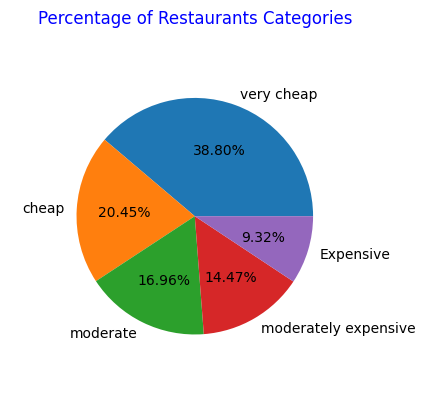

In [127]:
plt.pie(df['Category'].value_counts(),labels=list(df['Category'].unique()),autopct='%.2f%%',radius=0.8)
plt.title('Percentage of Restaurants Categories',color='blue')
plt.show()

## Top 5 most rated restaurants having more than 500 ratings.

In [128]:
df.loc[df['num of ratings']>=500].sort_values(by='rate (out of 5)',ascending=False).head(5)

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,Category
1035,Byg Brewski Brewing Company,Microbrewery,4.90,16345,1600.00,Yes,Yes,"Continental, North Indian, Italian, South Indi...",Bellandur,Sarjapur Road,Expensive
466,Asia Kitchen By Mainland China,"Casual Dining, Bar",4.90,2178,1500.00,Yes,Yes,"Asian, Chinese, Thai, Momos","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block,Expensive
4827,Punjab Grill,Casual Dining,4.80,650,2000.00,Yes,No,North Indian,Whitefield,Whitefield,Expensive
6496,The Pizza Bakery,Casual Dining,4.80,1724,1200.00,Yes,Yes,"Italian, Pizza, Beverages",Indiranagar,Indiranagar,Expensive
4444,OG Variar Sons,Bakery,4.80,1156,200.00,No,No,"Bakery, Desserts",Malleshwaram,Rajajinagar,very cheap


## Bivariate Analysis

In [131]:
pd.crosstab(df['Category'],df['table booking'])

table booking,No,Yes
Category,,
Expensive,225,437
cheap,2748,9
moderate,1412,41
moderately expensive,771,257
very cheap,1205,0


So, Table Booking option is mostly available in Expensive restaurants.

In [136]:
pd.crosstab(df['restaurant type'],df['Category']).sort_values(by='cheap',ascending=False)

Category,Expensive,cheap,moderate,moderately expensive,very cheap
restaurant type,,,,,
Quick Bites,0,1730,300,22,788
Delivery,0,190,118,24,26
"Takeaway, Delivery",4,161,75,9,40
Casual Dining,207,115,639,672,1
Dessert Parlor,3,107,29,4,74
...,...,...,...,...,...
"Fine Dining, Microbrewery",1,0,0,0,0
"Food Court, Beverage Shop",0,0,0,0,1
"Food Court, Casual Dining",0,0,2,0,0


so, cheap restaurants are mostly Quick Bites type.

In [138]:
pd.crosstab(df['restaurant type'],df['Category']).sort_values(by='Expensive',ascending=False)

Category,Expensive,cheap,moderate,moderately expensive,very cheap
restaurant type,,,,,
Casual Dining,207,115,639,672,1
Fine Dining,77,0,2,0,0
"Casual Dining, Bar",72,3,9,39,0
Lounge,55,0,0,3,0
Bar,50,1,2,29,0
...,...,...,...,...,...
Food Court,0,45,27,5,3
"Food Court, Beverage Shop",0,0,0,0,1
"Food Court, Casual Dining",0,0,2,0,0


Mostly Expensive resturants are for Casual Dining.

In [141]:
pd.crosstab(df['online_order'],df['Category'])

Category,Expensive,cheap,moderate,moderately expensive,very cheap
online_order,,,,,
No,467,1228,536,446,701
Yes,195,1529,917,582,504


Mostly Expensive restaurants are in-only restaurants dining.
Online order facility is mostly given by cheap and moderate restaurants.